In [ ]:
!pip install lifelines
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import make_column_transformer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from lifelines import KaplanMeierFitter, CoxPHFitter
import matplotlib.pyplot as plt
import seaborn as sns

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 3.8 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=b27f80892b5569b0a392401074fac339f6028e94f10b6aa202aabcbd24bf0f52
  Stored in directory: /root/.cache/pip/wheels/8b/67/f4/2caaae2146198dcb824f31a303833b07b14a5ec863fb3acd7b
Successfully built autograd-gamma


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Vedant /liver_cirrhosis.csv")
df.dtypes
df.isnull().sum()


,0
N_Days,0
Status,0
Drug,0
Age,0
Sex,0
Ascites,0
Hepatomegaly,0
Spiders,0
Edema,0
Bilirubin,0


In [ ]:
X = df.drop('Stage', axis=1)
y = df['Stage']


In [ ]:
enc= OneHotEncoder(sparse_output=False).set_output(transform='pandas')
ct=make_column_transformer((enc,['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']),
                            ('passthrough',['N_Days','Age','Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
                             'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']),
                            verbose_feature_names_out=False).set_output(transform='pandas')


X_transformed = ct.fit_transform(X)


In [ ]:

X_transformed['N_Days'] = df['N_Days']
X_transformed['Status'] = (df['Status'] == 'D').astype(int)



Kaplain Meier

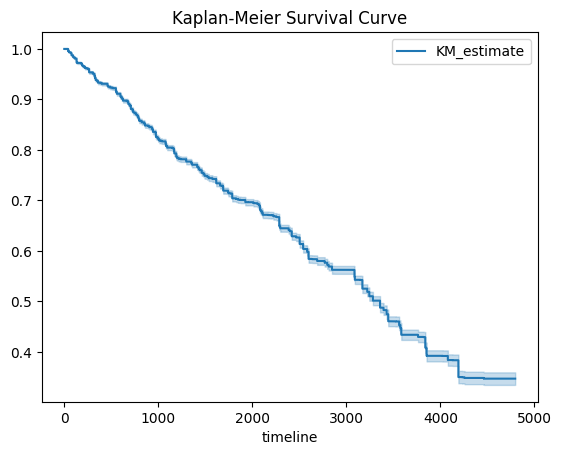

In [ ]:
kmf = KaplanMeierFitter()
kmf.fit(X_transformed['N_Days'],  event_observed=X_transformed['Status'])
kmf.plot_survival_function()
plt.title("Kaplan-Meier Survival Curve")
plt.show()


Cox Proportional Hazard

In [ ]:
cph = CoxPHFitter(penalizer=0.1)
cph.fit(X_transformed, duration_col='N_Days', event_col='Status')
cph.print_summary()


<lifelines.CoxPHFitter: fitted with 25000 total observations, 15544 right-censored observations>
             duration col = 'N_Days'
                event col = 'Status'
                penalizer = 0.1
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 25000
number of events observed = 9456
   partial log-likelihood = -77682.05
         time fit was run = 2025-03-12 07:11:49 UTC

---
                      coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                             
Status_C             -1.35      0.26      0.03           -1.41           -1.29                0.24                0.28
Status_CL            -0.76      0.47      0.06           -0.87           -0.65                0.42                0.52
Status_D              1.67      5.29      0.03            1.60            1.73                4.97                5.63
Drug_D-penicillamine -0.02      0.98      0.03           -0.09            0.04                0.92                1.04
Drug_Placebo          0.02      1.02      0.03           -0.04            0.09                0.96                1.09
Sex_F                 0.05      1.05      0.05           -0.04            0.14                0.96                1.15
Sex_M                -0.05      0.95      0.05           -0.14            0.04                0.87                1.04
Ascites_N            -0.04      0.96      0.03           -0.10            0.03                0.90                1.03
Ascites_Y             0.04      1.04      0.03           -0.03            0.10                0.97                1.11
Hepatomegaly_N       -0.04      0.96      0.03           -0.10            0.02                0.90                1.02
Hepatomegaly_Y        0.04      1.04      0.03           -0.02            0.10                0.98                1.11
Spiders_N            -0.08      0.93      0.03           -0.14           -0.02                0.87                0.98
Spiders_Y             0.08      1.08      0.03            0.02            0.14                1.02                1.15
Edema_N              -0.19      0.83      0.04           -0.26           -0.11                0.77                0.89
Edema_S               0.13      1.13      0.04            0.05            0.20                1.05                1.22
Edema_Y               0.32      1.37      0.05            0.22            0.41                1.25                1.51
Age                   0.00      1.00      0.00            0.00            0.00                1.00                1.00
Bilirubin             0.06      1.06      0.00            0.05            0.06                1.05                1.06
Cholesterol          -0.00      1.00      0.00           -0.00           -0.00                1.00                1.00
Albumin              -0.74      0.48      0.03           -0.79           -0.68                0.46                0.50
Copper                0.00      1.00      0.00            0.00            0.00                1.00                1.00
Alk_Phos             -0.00      1.00      0.00           -0.00           -0.00                1.00                1.00
SGOT                  0.00      1.00      0.00           -0.00            0.00                1.00                1.00
Tryglicerides        -0.00      1.00      0.00           -0.00           -0.00                1.00                1.00
Platelets            -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
Prothrombin           0.05      1.05      0.01            0.03            0.07                1.03                1.07

                      cmp to      z      p  -log2(p)
covariate                                           
Status_C                0.00 -41.80 <0.005       inf
Status_CL               0.00 -13.37 <0.005    133.11
Status_D              

In [ ]:
X_transformed['Hazard_Risk'] = cph.predict_partial_hazard(X_transformed.drop(['N_Days', 'Status'], axis=1))


In [ ]:
X_final = X_transformed.drop(['N_Days', 'Status'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(random_state=42)
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}
gcv= GridSearchCV(rf, param_grid, cv=5)
gcv.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [ ]:


best_rf = gcv.best_estimator_
print(gcv.best_params_)
print(gcv.best_score_)


{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
0.95


Log Rank Test

In [ ]:
from lifelines.statistics import logrank_test
male = X_transformed[df['Sex'] == 'M']
female = X_transformed[df['Sex'] == 'F']

results = logrank_test(male['N_Days'], female['N_Days'], event_observed_A=male['Status'], event_observed_B=female['Status'])
print(results.summary)

   test_statistic         p  -log2(p)
0        9.057489  0.002616  8.578306


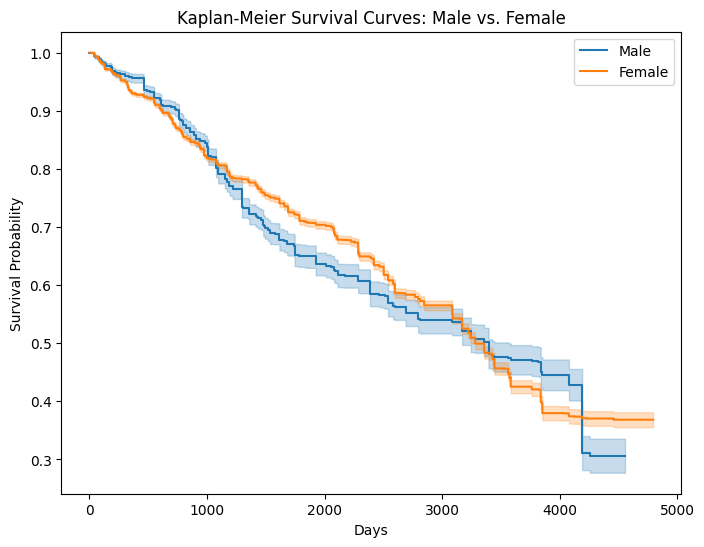

In [ ]:
kmf_male = KaplanMeierFitter()
kmf_female = KaplanMeierFitter()

plt.figure(figsize=(8, 6))
kmf_male.fit(male['N_Days'], event_observed=male['Status'], label='Male')
kmf_female.fit(female['N_Days'], event_observed=female['Status'], label='Female')

kmf_male.plot_survival_function()
kmf_female.plot_survival_function()
plt.title("Kaplan-Meier Survival Curves: Male vs. Female")
plt.xlabel("Days")
plt.ylabel("Survival Probability")
plt.legend()
plt.show()

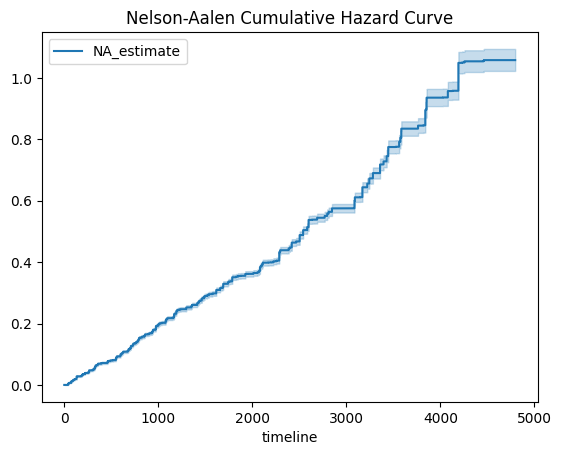

In [ ]:
from lifelines import NelsonAalenFitter

naf = NelsonAalenFitter()
naf.fit(X_transformed['N_Days'], event_observed=X_transformed['Status'])
naf.plot()
plt.title("Nelson-Aalen Cumulative Hazard Curve")
plt.show()


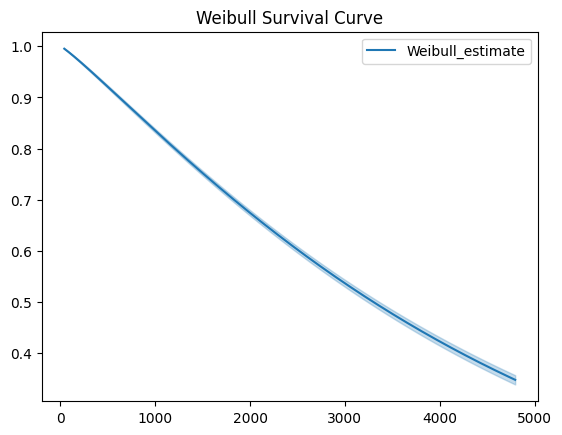

In [ ]:
from lifelines import WeibullFitter

wf = WeibullFitter()
wf.fit(X_transformed['N_Days'], event_observed=X_transformed['Status'])
wf.plot_survival_function()
plt.title("Weibull Survival Curve")
plt.show()

<lifelines.CoxPHFitter: fitted with 25000 total observations, 15544 right-censored observations>
             duration col = 'N_Days'
                event col = 'Status'
                penalizer = 0.1
                 l1 ratio = 0.5
      baseline estimation = breslow
   number of observations = 25000
number of events observed = 9456
   partial log-likelihood = -79856.55
         time fit was run = 2025-03-12 07:20:33 UTC

---
                      coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                             
Status_C             -1.01      0.36      0.04           -1.09           -0.93                0.34                0.39
Status_CL            -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
Status_D              1.85      6.35      0.04            1.78            1.92                5.90                6.84
Drug_D-penicillamine -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
Drug_Placebo          0.00      1.00      0.00           -0.00            0.00                1.00                1.00
Sex_F                 0.00      1.00      0.00           -0.00            0.00                1.00                1.00
Sex_M                -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
Ascites_N            -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
Ascites_Y             0.00      1.00      0.00           -0.00            0.00                1.00                1.00
Hepatomegaly_N       -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
Hepatomegaly_Y        0.00      1.00      0.00           -0.00            0.00                1.00                1.00
Spiders_N            -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
Spiders_Y             0.00      1.00      0.00           -0.00            0.00                1.00                1.00
Edema_N              -0.10      0.91      0.03           -0.15           -0.05                0.86                0.95
Edema_S               0.00      1.00      0.00           -0.00            0.00                1.00                1.00
Edema_Y               0.00      1.00      0.00           -0.00            0.00                1.00                1.00
Age                   0.00      1.00      0.00           -0.00            0.00                1.00                1.00
Bilirubin             0.03      1.03      0.00            0.03            0.03                1.03                1.03
Cholesterol           0.00      1.00      0.00           -0.00            0.00                1.00                1.00
Albumin              -0.39      0.68      0.03           -0.44           -0.33                0.64                0.72
Copper                0.00      1.00      0.00            0.00            0.00                1.00                1.00
Alk_Phos             -0.00      1.00      0.00           -0.00           -0.00                1.00                1.00
SGOT                  0.00      1.00      0.00           -0.00            0.00                1.00                1.00
Tryglicerides        -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
Platelets            -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
Prothrombin           0.00      1.00      0.00           -0.00            0.00                1.00                1.00
Hazard_Risk           0.02      1.02      0.00            0.02            0.03                1.02                1.03

                      cmp to      z      p  -log2(p)
covariate                                           
Status_C 

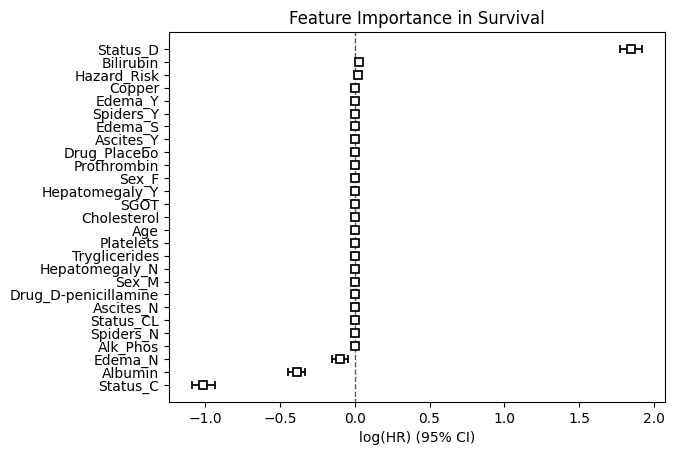

In [ ]:
from lifelines import CoxPHFitter

cph = CoxPHFitter(penalizer=0.1, l1_ratio=0.5)
cph.fit(X_transformed, duration_col='N_Days', event_col='Status')
cph.print_summary()
cph.plot()
plt.title("Feature Importance in Survival")
plt.show()